In [1]:
import pandas as pd
from datetime import timedelta
#Data processing
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('seatunnel_cluster_0.csv')

In [3]:
df.describe()

,commits,additions,deletions,changed_files,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,cluster
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0
mean,4.315197,228.612570,94.923077,10.208255,256.231707,138.257036,138.257036,137.922139,137.922139,255.532833,137.768293,137.768293,137.103189,385.274859,0.0
std,7.607020,534.552419,641.869390,21.316391,146.308722,88.256304,88.256304,104.276225,104.276225,145.618252,87.162154,87.162154,103.491936,205.978777,0.0
min,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,14.000000,12.000000,12.000000,7.000000,70.000000,0.0
25%,1.000000,4.000000,1.000000,1.000000,102.000000,35.250000,35.250000,33.000000,33.000000,102.000000,36.250000,36.250000,33.000000,142.000000,0.0
50%,2.000000,35.000000,6.000000,3.000000,257.000000,130.000000,130.000000,97.000000,97.000000,259.000000,130.000000,130.000000,98.000000,388.500000,0.0
75%,4.000000,183.000000,34.750000,9.000000,374.500000,203.000000,203.000000,239.000000,239.000000,373.000000,203.000000,203.000000,238.750000,545.000000,0.0
max,116.000000,5674.000000,17465.000000,258.000000,504.000000,285.000000,285.000000,307.000000,307.000000,504.000000,285.000000,285.000000,307.000000,696.000000,0.0


In [4]:
df.head(1)

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_time,end_time,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,cluster
0,84be0f9fd057b1680d001de38802ce1c28d79f04,9a2efa51c7180b369ecfea17efaae813d9d0bfc5,1,10,4,3,3 days 01:27:48,2023-06-02T07:22:03Z,2023-06-05T08:49:51Z,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0,0


In [5]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time', 'total_time' , 'commits', 'additions' , 'deletions', 'changed_files'])]

In [6]:
X

,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,cluster
0,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0,0
1,500.0,262.0,262.0,304.0,304.0,501.0,262.0,262.0,304.0,693.0,0
2,500.0,262.0,262.0,304.0,304.0,499.0,261.0,261.0,304.0,693.0,0
3,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0,0
4,499.0,261.0,261.0,304.0,304.0,500.0,262.0,262.0,304.0,693.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1061,16.0,14.0,14.0,7.0,7.0,16.0,15.0,15.0,7.0,102.0,0
1062,14.0,12.0,12.0,8.0,8.0,16.0,14.0,14.0,7.0,89.0,0
1063,14.0,12.0,12.0,8.0,8.0,16.0,14.0,14.0,7.0,89.0,0
1064,2.0,3.0,3.0,3.0,3.0,16.0,14.0,14.0,7.0,89.0,0


In [7]:
scaler = preprocessing.MinMaxScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

In [8]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
number_of_cluster = []

for i in range(2, len(df_scaler)):
    km = KMeans(n_clusters = i)
    km.fit(df_scaler)
    sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    number_of_cluster.append([sil_avg , i])


c:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [10]:
print(f'Optimum number of cluster: {max(number_of_cluster)[1]}')

Optimum number of cluster: 2


In [11]:
number_of_cluster.sort()

In [12]:
number_of_cluster = number_of_cluster[::-1]

In [41]:
number_of_cluster

[[0.7889, 2],
 [0.6096, 7],
 [0.5873, 6],
 [0.5455, 10],
 [0.5455, 9],
 [0.5455, 8],
 [0.4217, 5],
 [0.3872, 4],
 [0.3836, 3]]

In [13]:
number_of_cluster[:5]

[[0.7889, 2], [0.6096, 7], [0.5873, 6], [0.5455, 10], [0.5455, 9]]

In [14]:
df.shape

(1066, 20)

In [15]:
# Perform KMeans clustering
num_clusters = max(number_of_cluster)[1]
kmeans = KMeans(n_clusters=num_clusters)

In [40]:
kmeans

KMeans(n_clusters=2)

In [16]:
cluster_labels = kmeans.fit_predict(X)

c:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [17]:
df['cluster'] = cluster_labels

In [18]:
df.shape

(1066, 20)

In [19]:
df['total_time'].min()

'0 days 00:00:05'

In [20]:
df['total_time'].max()

'9 days 22:50:15'

In [21]:
cluster_0 = df[df['cluster'] == 0]
print(cluster_0['total_time'].min())
print(cluster_0['total_time'].max())
cluster_0.shape

0 days 00:00:05
9 days 22:50:15


(493, 20)

In [22]:
cluster_1 = df[df['cluster'] == 1]
print(cluster_1['total_time'].min())
print(cluster_1['total_time'].max())
cluster_1.shape

0 days 00:00:06
9 days 12:50:49


(573, 20)

In [23]:
# data_cluster = cluster_0.loc[:, ~cluster_0.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time', 'total_time'])]

In [24]:
# scaler_cluster = preprocessing.MinMaxScaler()
# df_scaler_cluster = scaler.fit_transform(data_cluster)
# df_scaler_col_cluster = pd.DataFrame(df_scaler_cluster)
# df_scaler_cluster = df_scaler_cluster.T

In [25]:
# df_scaler_cluster

In [26]:
# cluster = []
#
# for i in range(2, len(df_scaler_cluster)):
#     km = KMeans(n_clusters = i)
#     km.fit(df_scaler_cluster)
#     sil_avg = silhouette_score(df_scaler_cluster, km.labels_).round(4)
#     cluster.append([sil_avg , i])

In [27]:
# print(f'Optimum number of cluster: {max(cluster)[1]}')

In [28]:
# Perform KMeans clustering
# num_clusters = max(cluster)[1]
# kmeans = KMeans(n_clusters=num_clusters)
# cluster_labels_2 = kmeans.fit_predict(data_cluster)

In [29]:
# cluster_0['cluster2'] = cluster_labels_2

In [30]:
# cluster_0_1 = cluster_0[cluster_0['cluster2'] == 1]
# print(cluster_0['total_time'].min())
# print(cluster_0['total_time'].max())
# cluster_0_1.shape

In [31]:
def remove_outliers_madn(data, threshold=2.24):
    median = np.median(data)
    mad = np.median(np.abs(data - median))

    # Calculate modified Z-score for each data point
    modified_z_scores = 0.6745 * (data - median) / mad

    # Identify and remove outliers based on the threshold
    filtered_data = data[abs(modified_z_scores) < threshold]

    return filtered_data

In [32]:
# Example usage
filtered_data = remove_outliers_madn(df_scaler, threshold=2.24)
print("Original data:", df_scaler)
print("Filtered data:", filtered_data)

Original data: [[0.99203187 0.99203187 0.99203187 ... 0.02390438 0.         0.        ]
 [0.91843972 0.91843972 0.91843972 ... 0.03191489 0.         0.        ]
 [0.91843972 0.91843972 0.91843972 ... 0.03191489 0.         0.        ]
 ...
 [0.99       0.99       0.99       ... 0.         0.         0.00333333]
 [0.99520767 0.99520767 0.99520767 ... 0.03035144 0.03035144 0.03035144]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Filtered data: [0.99203187 0.99203187 0.99203187 ... 0.         0.         0.        ]


c:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


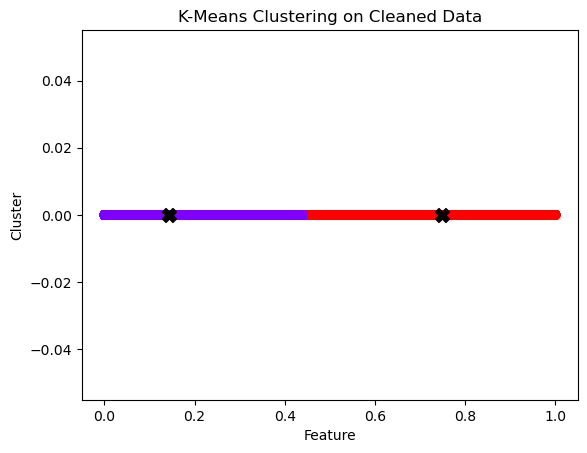

In [33]:
# Reshape the data to a 2D array if needed
cleaned_data = filtered_data.reshape(-1, 1)

# Specify the number of clusters you want to find
n_clusters = 2

# Initialize and fit K-Means model
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(cleaned_data)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(cleaned_data, np.zeros_like(cleaned_data), c=labels, cmap='rainbow')
plt.scatter(cluster_centers, np.zeros_like(cluster_centers), marker='X', color='black', s=100)
plt.title('K-Means Clustering on Cleaned Data')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

In [34]:
time_score = df['total_time']
time_score = pd.DataFrame(time_score)

In [35]:
time_score

,total_time
0,3 days 01:27:48
1,3 days 04:15:10
2,0 days 05:24:03
3,4 days 00:22:26
4,12 days 00:39:27
...,...
1061,0 days 00:43:10
1062,0 days 19:01:39
1063,0 days 00:16:22
1064,0 days 00:33:35


In [36]:
df.head(1)

,begin_sha,end_sha,commits,additions,deletions,changed_files,total_time,begin_time,end_time,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers,cluster
0,84be0f9fd057b1680d001de38802ce1c28d79f04,9a2efa51c7180b369ecfea17efaae813d9d0bfc5,1,10,4,3,3 days 01:27:48,2023-06-02T07:22:03Z,2023-06-05T08:49:51Z,500.0,262.0,262.0,304.0,304.0,500.0,261.0,261.0,304.0,693.0,0


In [37]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary_1 = dataframe[col_name].mean() + 1 * dataframe[col_name].std()
    lower_boundary_1 = dataframe[col_name].mean() - 1 * dataframe[col_name].std()
    upper_boundary_2 = dataframe[col_name].mean() + 2 * dataframe[col_name].std()
    lower_boundary_2 = dataframe[col_name].mean() - 2 * dataframe[col_name].std()
    return upper_boundary_1, upper_boundary_2 , lower_boundary_1, lower_boundary_2

In [38]:
determine_outlier_thresholds_std(time_score, time_score.columns)

C:\Users\patcharaprapa_k\AppData\Local\Temp\ipykernel_15808\3125237276.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper_boundary_1 = dataframe[col_name].mean() + 1 * dataframe[col_name].std()
C:\Users\patcharaprapa_k\AppData\Local\Temp\ipykernel_15808\3125237276.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper_boundary_1 = dataframe[col_name].mean() + 1 * dataframe[col_name].std()
C:\Users\patcharaprapa_k\AppData\Local\Temp\ipykernel_15808\3125237276.py:3: FutureWarning: The default value of numeric_only in DataFr

(Series([], dtype: float64),
 Series([], dtype: float64),
 Series([], dtype: float64),
 Series([], dtype: float64))

In [39]:
import pandas as pd
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Loop through combinations of columns in the data frame
def get_column_combinations(data_frame):
    columns = data_frame.columns
    col_combinations = []

    for r in range(1, len(columns) + 1):
        for combo in combinations(columns, r):
            col_combinations.append(combo)

    return col_combinations

# Step 3: Scale the data using MinMaxScaler
def scale_data(data, columns):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[columns])
    return pd.DataFrame(scaled_data, columns=columns)

# Step 4: Determine the optimal number of clusters using silhouette score
def get_optimal_num_clusters(data):
    scores = []
    for num_clusters in range(2, len(data) + 1):
        km = KMeans(n_clusters=num_clusters)
        km.fit(data)
        sil_avg = silhouette_score(data, km.labels_).round(4)
        scores.append((sil_avg, num_clusters))

    scores.sort(reverse=True)
    return scores[:5]

# Step 7: Get cluster statistics
def get_cluster_statistics(data, cluster_labels):
    cluster_info = {}
    for cluster_num in range(max(cluster_labels) + 1):
        cluster_data = data[cluster_labels == cluster_num]
        cluster_info[cluster_num] = {
            'min_time': cluster_data['total_time'].min(),
            'max_time': cluster_data['total_time'].max(),
            'shape': cluster_data.shape
        }
    return cluster_info

# Step 9: Check for outliers using standard deviation thresholds
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary_1 = dataframe[col_name].mean() + 1 * dataframe[col_name].std()
    lower_boundary_1 = dataframe[col_name].mean() - 1 * dataframe[col_name].std()
    upper_boundary_2 = dataframe[col_name].mean() + 2 * dataframe[col_name].std()
    lower_boundary_2 = dataframe[col_name].mean() - 2 * dataframe[col_name].std()
    return upper_boundary_1, upper_boundary_2, lower_boundary_1, lower_boundary_2

# Example usage:
data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
column_combinations = get_column_combinations(data)
scaled_data = scale_data(data, column_combinations)
optimal_clusters = get_optimal_num_clusters(scaled_data)
kmeans = KMeans(n_clusters=optimal_clusters[0][1])
cluster_labels = kmeans.fit_predict(scaled_data)
cluster_info = get_cluster_statistics(data, cluster_labels)
outlier_thresholds = determine_outlier_thresholds_std(data, 'total_time')

# Print cluster information
for cluster_num, info in cluster_info.items():
    print(f"Cluster {cluster_num}:")
    print(f"Min Time: {info['min_time']}")
    print(f"Max Time: {info['max_time']}")
    print(f"Shape: {info['shape']}")


KeyError: "None of [Index([('A',), ('B',), ('C',), ('A', 'B'), ('A', 'C'), ('B', 'C'),\n       ('A', 'B', 'C')],\n      dtype='object')] are in the [columns]"